In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import umap
from sklearn import preprocessing
from sklearn.cluster import KMeans 

In [87]:
data = pd.read_parquet('../data/processed/news-consolidated-v3.parquet')
data = data.sample(10000)
print(data["headline"])

5426                            georgia steps back in time
55867              lewis the republic cause is on the wane
47356    tony abbott emissions trading around the world...
34589    department accused of taking too many risks du...
59563         social media to play big role in wa election
                               ...                        
21077         call for transport interchange to be seen as
84561    Underestimated risks of recurrent long-range a...
22819                      obama takes the lead in florida
47809    state hospitals to be scrutinised for waste an...
17648                     carpenter out of step on uranium
Name: headline, Length: 10000, dtype: object


In [88]:
X = np.stack(data["embedding"])
Kmean = KMeans(n_clusters=6)
Kmean.fit(X)

/Users/rithwikseth/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [142]:
fit = umap.UMAP(metric='cosine', n_components=3)
u = fit.fit_transform(X)

/Users/rithwikseth/miniconda3/lib/python3.9/multiprocessing/resource_tracker.py:96: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '


(10000, 3)


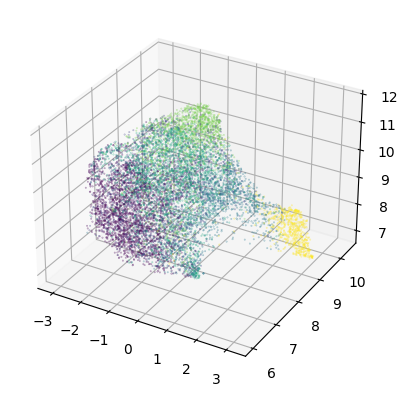

In [143]:
print(u.shape)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(u[:,0], u[:,1], u[:, 2], s=.1, alpha=0.5, c=Kmean.labels_)
plt.show()

In [148]:
import json
u = pd.DataFrame(u, columns=['x', 'y', 'z'])
x = np.array(u['x'])
y = np.array(u['y'])
z = np.array(u['z'])
u['headline'] = data['headline'].values
u['cluster'] = Kmean.labels_
df_dict = {col: u[col].tolist() for col in u.columns}

# write the dictionary to a json file
with open('../data/processed/umap.json', 'w') as f:
    json.dump(df_dict, f)
    f.close()


In [57]:
val1 = data[Kmean.labels_ == 0]
val2 = data[Kmean.labels_ == 1]
val3 = data[Kmean.labels_ == 2]
val4 = data[Kmean.labels_ == 3]
val5 = data[Kmean.labels_ == 4]
val6 = data[Kmean.labels_ == 5]
val2 = val2["headline"].sample(200)
val2.to_csv("val1.csv")